### feature selection(변수 선택법)
* 필요한 변수만 선택하여 모델의 예측력을 높이거나 과적합을 줄이는 것
* 알고리즘의 정확도가 유사하다면 변수의 개수가 적을수록 속도가 빠르다
* 방법
  
    - 단변량(filter) : 특정 컬럼이 또 다른 컬럼과 상관관계가 있는지 확인하는 방법
    - 전진/후진 선택법(wrapper) : 컬럼을 하나씩 추가하며 점수 확인 / 하나씩 빼며 점수 확인
    - RFE : 사이킷런에서 제공하는 라이브러리를 이용하여 변수의 중요도를 확인하여 변수를 선택하는 방법
    - embed(임베드) : 알고리즘의 성질 이용
        - 알고리즘 내부에서 각 feature 구송 요소들이 얼마나 사용 되었는지를 알아보는 방식
        - 알고리즘들을 이용해 변수의 중요도를 파악, 중요도 낮은 컬럼은 지울 수 있다
        - 참고
            * RFE와 embed 방식은 특정 알고리즘에 존재하며, 해당 방식을 사용할 수 없는 알고리즘들이 존재한다.(KNN, SVR(kernel=rbf)등 사용 못함)
            * Tree계열 알고리즘들은 사용 가능하다(Random Forest, Decision Tree 등)

In [ ]:
# 단변량 : 비슷한 컬럼들을 확인 후 제거하는 것
# embed : Tree 계열 알고리즘에서만 사용 가능, 각 컬럼의 티어를 알려준다.

In [1]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
df = pd.read_csv("../data_set/6.회귀/data_cleaning.csv")
df.head()

datetime  season  holiday  workingday  weather  temp  ...  count  year  month  day  hour  temp_int
0  2011-01-01 00:00:00       1        0           0        1  9.84  ...     16  2011      1    1     0         9
1  2011-01-01 01:00:00       1        0           0        1  9.02  ...     40  2011      1    1     1         9
2  2011-01-01 02:00:00       1        0           0        1  9.02  ...     32  2011      1    1     2         9
3  2011-01-01 03:00:00       1        0           0        1  9.84  ...     13  2011      1    1     3         9
4  2011-01-01 04:00:00       1        0           0        1  9.84  ...      1  2011      1    1     4         9

[5 rows x 17 columns]

In [2]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'temp_int'],
      dtype='object')

In [3]:
f = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']
l = "count"
X, y = df[f], df[l]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print("train : ", model.score(X_train, y_train))
print("test : ", model.score(X_test, y_test))

train :  0.9916614979489478
test :  0.9410126086888452


<Axes: xlabel='temp', ylabel='atemp'>

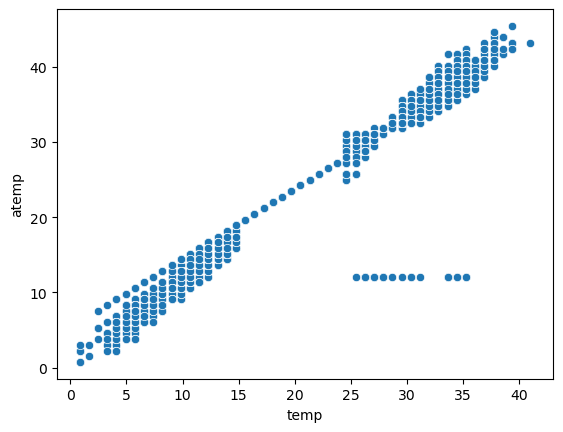

In [14]:
# 서로의 상관관계가 높을 수록 그래프가 일정하게 상승 또는 하강한다
import seaborn as sns
sns.scatterplot(data=df, x="temp", y="atemp")

In [11]:
# 각 컬럼 간의 상관관계를 보여준다
# temp 와 atemp 의 상관관계가 1에 가깝기 때문에
# 제거해도 될듯 하다
df.corr(numeric_only=True)

season   holiday  workingday   weather      temp  ...      year     month       day      hour  temp_int
season      1.000000  0.029368   -0.008126  0.008879  0.258689  ... -0.004797  0.971524  0.001729 -0.006546  0.257917
holiday     0.029368  1.000000   -0.250491 -0.007074  0.000295  ...  0.012021  0.001731 -0.015877 -0.000354  0.000192
workingday -0.008126 -0.250491    1.000000  0.033772  0.029966  ... -0.002482 -0.003394  0.009829  0.002780  0.029603
weather     0.008879 -0.007074    0.033772  1.000000 -0.055035  ... -0.012548  0.012144 -0.007890 -0.022740 -0.054556
temp        0.258689  0.000295    0.029966 -0.055035  1.000000  ...  0.061226  0.257589  0.015551  0.145430  0.999313
atemp       0.264744 -0.005215    0.024660 -0.055376  0.984948  ...  0.058540  0.264173  0.011866  0.140343  0.984431
humidity    0.190610  0.001929   -0.010880  0.406244 -0.064949  ... -0.078606  0.204537 -0.011335 -0.278011 -0.064205
windspeed  -0.147121  0.008409    0.013373  0.007261 -0.017852  ... -0.015221 -0.150192  0.036157  0.146631 -0.017660
casual      0.096758  0.043799   -0.319111 -0.135918  0.467097  ...  0.145241  0.092722  0.014109  0.302045  0.467047
registered  0.164011 -0.020956    0.119460 -0.109340  0.318571  ...  0.264265  0.169451  0.019111  0.380540  0.318048
count       0.163439 -0.005393    0.011594 -0.128655  0.394454  ...  0.260403  0.166862  0.019826  0.400601  0.394003
year       -0.004797  0.012021   -0.002482 -0.012548  0.061226  ...  1.000000 -0.004932  0.001800 -0.004234  0.060692
month       0.971524  0.001731   -0.003394  0.012144  0.257589  ... -0.004932  1.000000  0.001974 -0.006818  0.256862
day         0.001729 -0.015877    0.009829 -0.007890  0.015551  ...  0.001800  0.001974  1.000000  0.001132  0.016202
hour       -0.006546 -0.000354    0.002780 -0.022740  0.145430  ... -0.004234 -0.006818  0.001132  1.000000  0.145353
temp_int    0.257917  0.000192    0.029603 -0.054556  0.999313  ...  0.060692  0.256862  0.016202  0.145353  1.000000

[16 rows x 16 columns]

<Axes: >

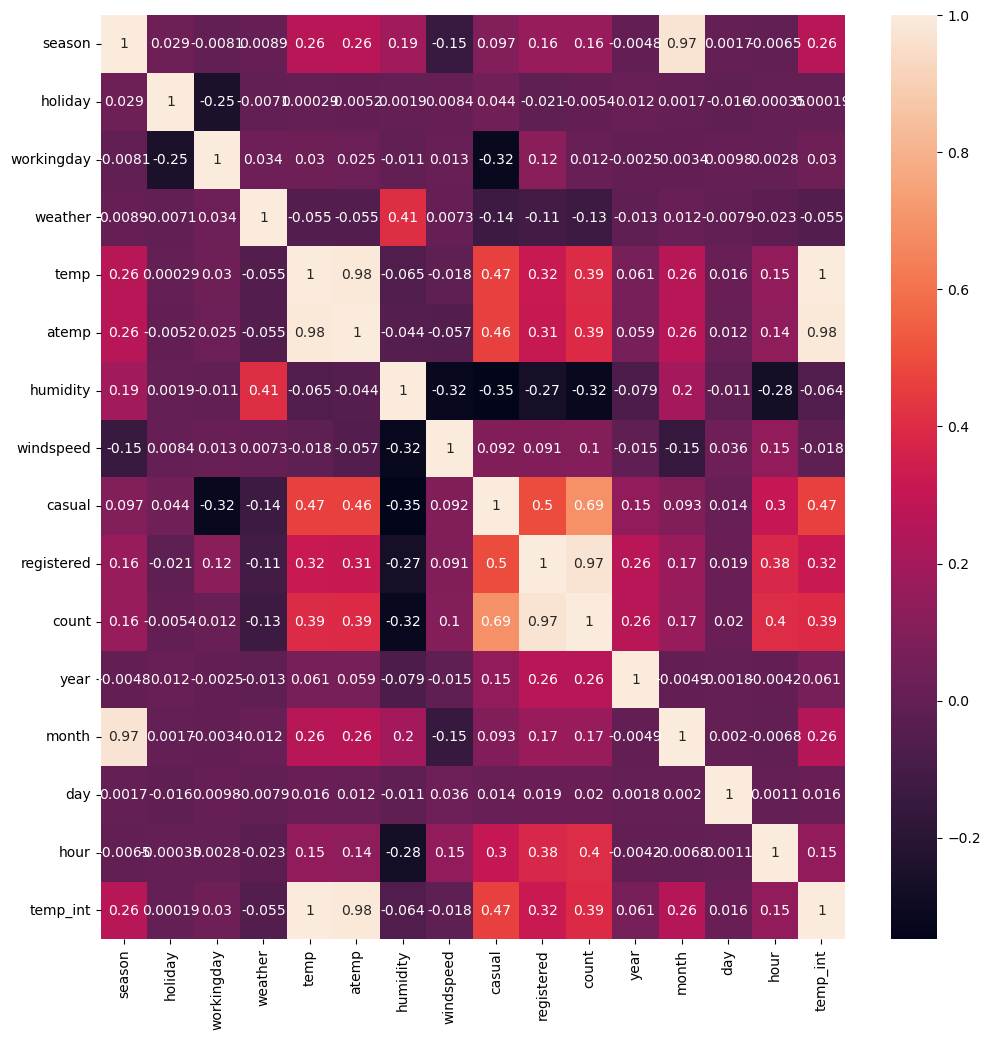

In [13]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True), annot=True)

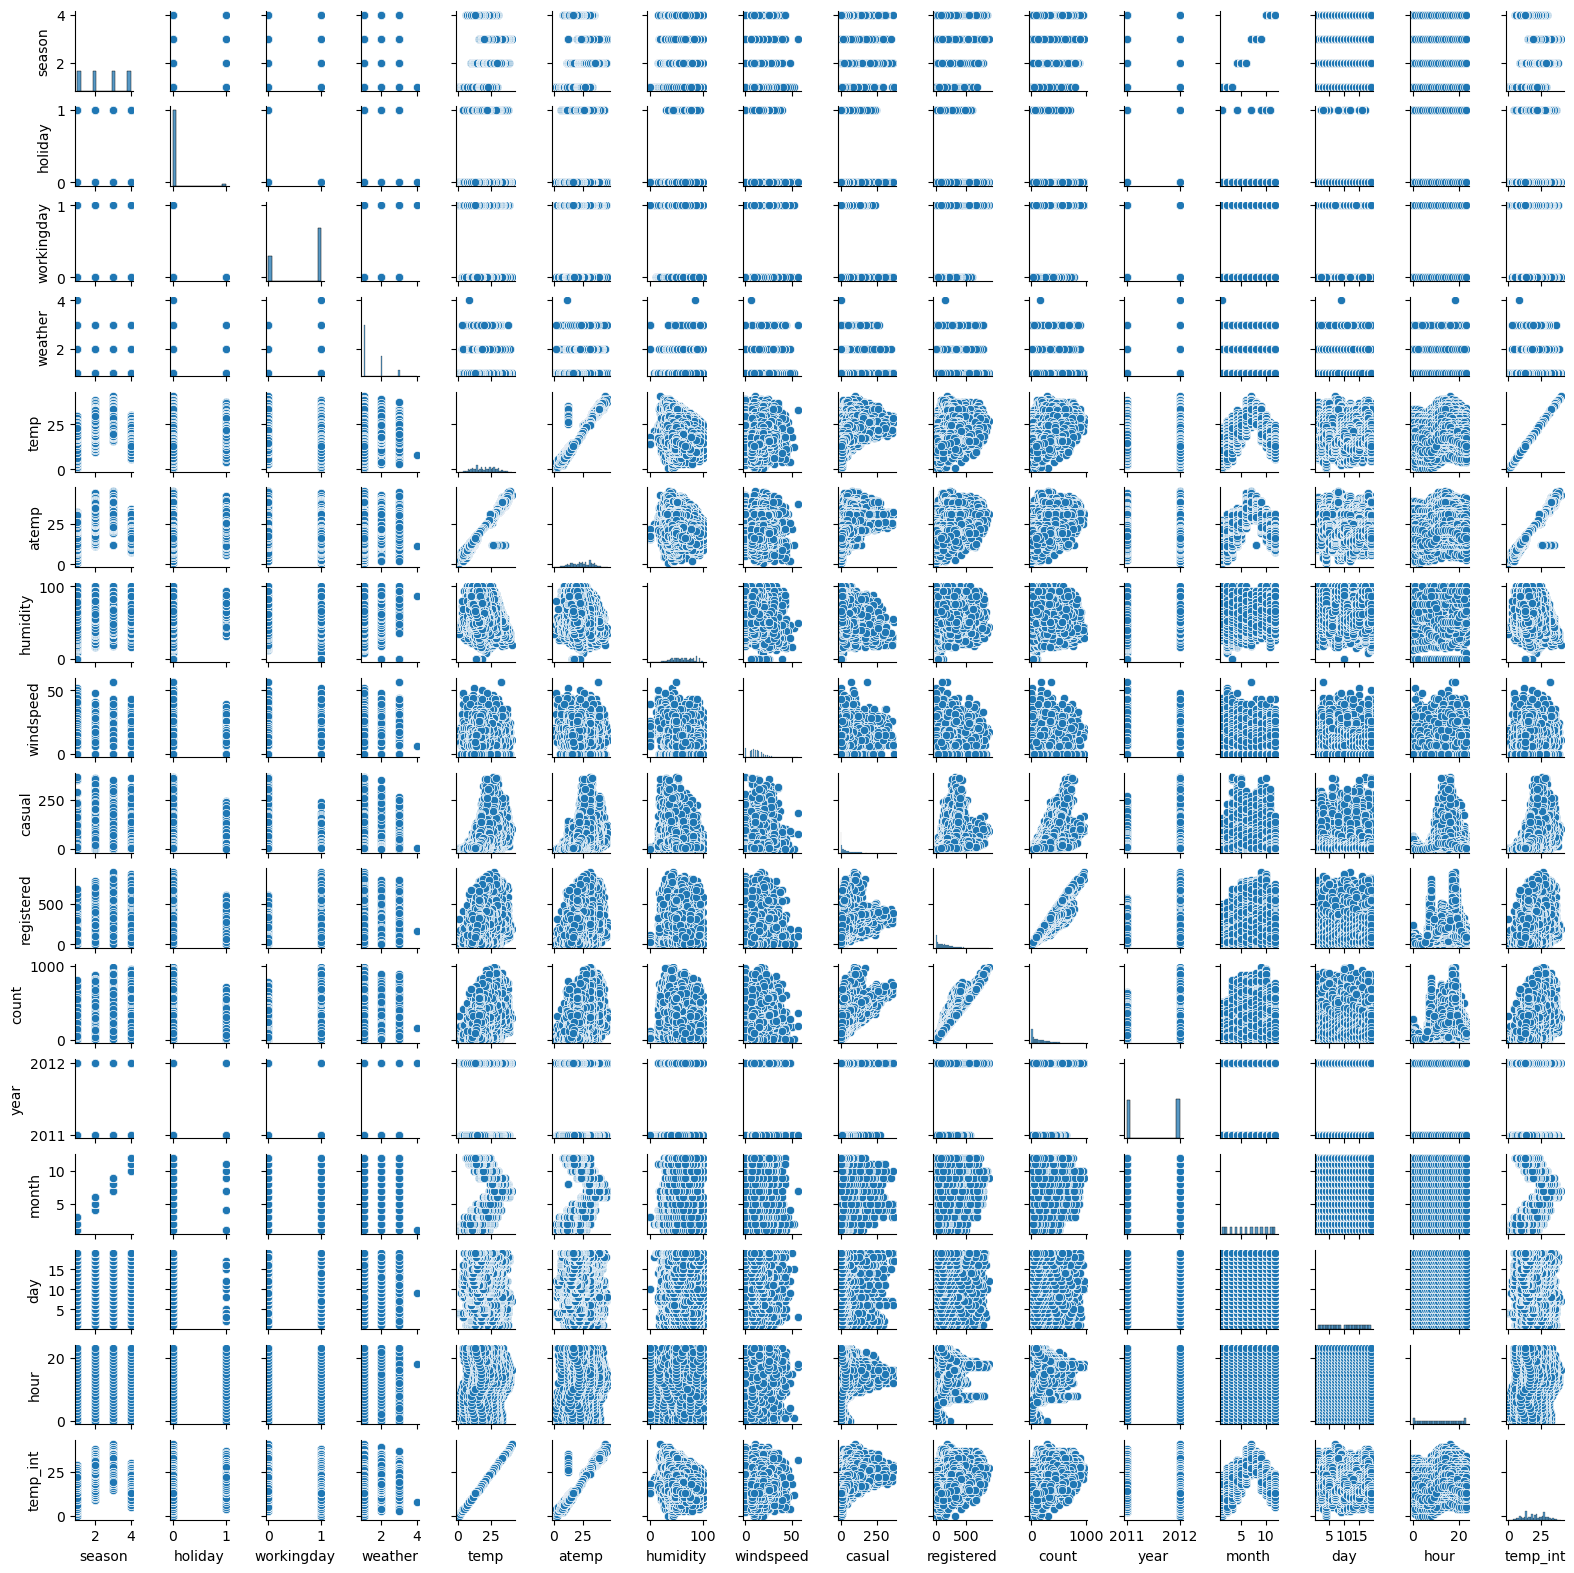

In [16]:
# 상관관계가 비슷한 것들은 / 이 형태나 \ 이 형태로 값이
# 일정하게 줄어들거나 늘어난다
sns.pairplot(df, height=1)

In [18]:
# atemp 삭제
f = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour']

# atemp 컬럼을 삭제해도 예측 결과 값에는 영향을 크게 끼치지 않았음
# atemp 와 temp 가 거의 동일한 컬럼이었기 때문...!
X_train, X_test, y_train, y_test = train_test_split(df[f], df[l], test_size=0.3)
model = RandomForestRegressor()
model.fit(X_train, y_train)
print("train : ", model.score(X_train, y_train))
print("test : ", model.score(X_test, y_test))

train :  0.9917278017758199
test :  0.9399504472888517


### wrapper(전진/후진 선택)
* feature를 추가 / 제거하면서 모델의 성능을 확인한다
* combinations : 모든 값들의 경우의 수를 뽑아준다

In [22]:
from itertools import combinations
sample_bag = [1,2,3,4]
for c in combinations(sample_bag, 2) :
    # sample_bag 를 2개씩 뽑으라는 뜻
    print(c, type(c))

(1, 2) <class 'tuple'>
(1, 3) <class 'tuple'>
(1, 4) <class 'tuple'>
(2, 3) <class 'tuple'>
(2, 4) <class 'tuple'>
(3, 4) <class 'tuple'>


In [25]:
all_result = []

# combinations() 가 컬럼들을 2개씩 묶어준다
for c in combinations(f, 2):
    print(c)

('season', 'holiday')
('season', 'workingday')
('season', 'weather')
('season', 'temp')
('season', 'humidity')
('season', 'windspeed')
('season', 'year')
('season', 'month')
('season', 'day')
('season', 'hour')
('holiday', 'workingday')
('holiday', 'weather')
('holiday', 'temp')
('holiday', 'humidity')
('holiday', 'windspeed')
('holiday', 'year')
('holiday', 'month')
('holiday', 'day')
('holiday', 'hour')
('workingday', 'weather')
('workingday', 'temp')
('workingday', 'humidity')
('workingday', 'windspeed')
('workingday', 'year')
('workingday', 'month')
('workingday', 'day')
('workingday', 'hour')
('weather', 'temp')
('weather', 'humidity')
('weather', 'windspeed')
('weather', 'year')
('weather', 'month')
('weather', 'day')
('weather', 'hour')
('temp', 'humidity')
('temp', 'windspeed')
('temp', 'year')
('temp', 'month')
('temp', 'day')
('temp', 'hour')
('humidity', 'windspeed')
('humidity', 'year')
('humidity', 'month')
('humidity', 'day')
('humidity', 'hour')
('windspeed', 'year')
('w

In [27]:
for c in combinations(f, 2):
    # 컬럼을 list 자료형으로 형변환해서 사용해야 한다
    print( df[list(c)] )

       season  holiday
0           1        0
1           1        0
2           1        0
3           1        0
4           1        0
...       ...      ...
10881       4        0
10882       4        0
10883       4        0
10884       4        0
10885       4        0

[10886 rows x 2 columns]
       season  workingday
0           1           0
1           1           0
2           1           0
3           1           0
4           1           0
...       ...         ...
10881       4           1
10882       4           1
10883       4           1
10884       4           1
10885       4           1

[10886 rows x 2 columns]
       season  weather
0           1        1
1           1        1
2           1        1
3           1        1
4           1        1
...       ...      ...
10881       4        1
10882       4        1
10883       4        1
10884       4        1
10885       4        1

[10886 rows x 2 columns]
       season   temp
0           1   9.84
1           1   

In [29]:
for c in combinations(f, 2):
    X_train, X_test, y_train, y_test = train_test_split(df[list(c)], df['count'], test_size=0.3)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(str(c))
    print("train : ", train_score)
    print("test : ", test_score)
    print("="*20)

('season', 'holiday')
train :  0.05845819571136379
test :  0.06801029389571611
('season', 'workingday')
train :  0.06119690546536827
test :  0.06356368452321925
('season', 'weather')
train :  0.07576082202281542
test :  0.08724412927488545
('season', 'temp')
train :  0.23284427316676115
test :  0.2126150527730073
('season', 'humidity')
train :  0.28060963515764825
test :  0.2553308376517509
('season', 'windspeed')
train :  0.09695952795617624
test :  0.0870184127764726
('season', 'year')
train :  0.12481734997659888
test :  0.1419045806133954
('season', 'month')
train :  0.07110487449658509
test :  0.07775741473009401
('season', 'day')
train :  0.0730837414840454
test :  0.0508598813046125
('season', 'hour')
train :  0.6119506571560571
test :  0.603707014633353
('holiday', 'workingday')
train :  6.254614111333989e-05
test :  -7.213416623663704e-05
('holiday', 'weather')
train :  0.018203745414681616
test :  0.017385163764621958
('holiday', 'temp')
train :  0.16992644518592026
test :  0

In [30]:
for c in combinations(f, 2):
    X_train, X_test, y_train, y_test = train_test_split(df[list(c)], df['count'], test_size=0.3)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    result = {"combination" : str(c), "train" : train_score, "test" : test_score}
    all_result.append(result)
all_result

[{'combination': "('season', 'holiday')",
  'train': 0.06429541388996607,
  'test': 0.05439025396453023},
 {'combination': "('season', 'workingday')",
  'train': 0.06534159774564652,
  'test': 0.05273019184958949},
 {'combination': "('season', 'weather')",
  'train': 0.08216391857162053,
  'test': 0.07265795524806051},
 {'combination': "('season', 'temp')",
  'train': 0.2351771066164272,
  'test': 0.20490765892966023},
 {'combination': "('season', 'humidity')",
  'train': 0.2856744999467695,
  'test': 0.24563783000940131},
 {'combination': "('season', 'windspeed')",
  'train': 0.09543727422483361,
  'test': 0.08810482783949436},
 {'combination': "('season', 'year')",
  'train': 0.13202699951491037,
  'test': 0.12640899224946056},
 {'combination': "('season', 'month')",
  'train': 0.0741459578302236,
  'test': 0.06991633720348411},
 {'combination': "('season', 'day')",
  'train': 0.07435037626015506,
  'test': 0.04502838971546008},
 {'combination': "('season', 'hour')",
  'train': 0.606

In [37]:
# test 를 기준으로 오름차순으로 정렬
result_df = pd.DataFrame(all_result).sort_values(by="test")

# test 의 점수가 가장 높은 5가지를 확인
result_df.tail()

combination     train      test
9        ('season', 'hour')  0.606406  0.616188
51         ('year', 'hour')  0.620818  0.617996
81   ('workingday', 'hour')  0.657728  0.644720
136  ('workingday', 'hour')  0.657899  0.644887
26   ('workingday', 'hour')  0.651633  0.659805

In [38]:
fe = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour']

# 가장 좋은 조합
best_f = ["workingday", "hour"]

In [41]:
all_result = []
for f in fe:
    # 가장 좋은 조합을 확인하기 위해
    # feature 하나씩 추가해서 확인
    best_f.append(f)
    # print(best_f)

    X_train, X_test, y_train, y_test = train_test_split(df[best_f], df['count'], test_size=0.3)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    train_s = model.score(X_train, y_train)
    test_s = model.score(X_test, y_test)

    result = {"combin" : best_f.copy(), "train" : train_s, "test" : test_s}
    all_result.append(result)

    # 다음 feature를 넣어서 확인하기 위해 마지막에 넣은 feature 제거
    best_f.pop()
    # print(best_f)

all_result

[{'combin': ['workingday', 'hour', 'season'],
  'train': 0.7580913458160565,
  'test': 0.7440944945103845},
 {'combin': ['workingday', 'hour', 'holiday'],
  'train': 0.6650019150696596,
  'test': 0.6345567260841918},
 {'combin': ['workingday', 'hour', 'workingday'],
  'train': 0.6590593073097475,
  'test': 0.6431016423118261},
 {'combin': ['workingday', 'hour', 'weather'],
  'train': 0.6926684259802643,
  'test': 0.6668174416876799},
 {'combin': ['workingday', 'hour', 'temp'],
  'train': 0.8323620614455098,
  'test': 0.7295907373392445},
 {'combin': ['workingday', 'hour', 'humidity'],
  'train': 0.8004993632245669,
  'test': 0.600456524550598},
 {'combin': ['workingday', 'hour', 'windspeed'],
  'train': 0.6990780034197865,
  'test': 0.6266172439536393},
 {'combin': ['workingday', 'hour', 'year'],
  'train': 0.767761505426242,
  'test': 0.7636787124282669},
 {'combin': ['workingday', 'hour', 'month'],
  'train': 0.7863534443871265,
  'test': 0.7419456112733107},
 {'combin': ['workingday

In [42]:
# test 를 기준으로 오름차순으로 정렬
result_df = pd.DataFrame(all_result).sort_values(by="test")

# test 의 점수가 가장 높은 5가지를 확인
result_df.tail()

combin     train      test
3  [workingday, hour, weather]  0.692668  0.666817
4     [workingday, hour, temp]  0.832362  0.729591
8    [workingday, hour, month]  0.786353  0.741946
0   [workingday, hour, season]  0.758091  0.744094
7     [workingday, hour, year]  0.767762  0.763679

In [50]:
# 함수로 위 과정 처리
def features_select(feature, best_f):
    all_result = []
    for f in feature:
        # 가장 좋은 조합을 확인하기 위해
        # feature 하나씩 추가해서 확인
        best_f.append(f)
        # print(best_f)
    
        X_train, X_test, y_train, y_test = train_test_split(df[best_f], df['count'], test_size=0.3)
        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        train_s = model.score(X_train, y_train)
        test_s = model.score(X_test, y_test)
    
        result = {"combin" : best_f.copy(), "train" : train_s, "test" : test_s}
        all_result.append(result)
    
        # 다음 feature를 넣어서 확인하기 위해 마지막에 넣은 feature 제거
        best_f.pop()
        # print(best_f)
    return all_result;

In [51]:
fe = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'month', 'day', 'hour']

# 가장 좋은 조합
best_f = ["workingday", "hour", "year"]

In [52]:
# test 를 기준으로 오름차순으로 정렬
result_df = pd.DataFrame(features_select(fe, best_f)).sort_values(by="test")

# test 의 점수가 가장 높은 5가지를 확인
result_df.tail()

combin     train      test
2  [workingday, hour, year, workingday]  0.764556  0.771759
3     [workingday, hour, year, weather]  0.802760  0.778615
4        [workingday, hour, year, temp]  0.927649  0.848878
0      [workingday, hour, year, season]  0.874880  0.861009
7       [workingday, hour, year, month]  0.906467  0.881726

In [53]:
# 이제 후진 선택법을 사용해 볼 것임

fe = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'month', 'day', 'hour', "workingday", "hour", "year"]

# best_f = []

In [55]:
all_result = []

for c in combinations(fe, len(fe)-1):
    # feature 에서 전체 컬럼의 수 -1 을 해서 하나씩 빼가면서
    # 테스트를 해보겠다는 뜻
    target = list(c)
    # print(target)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    train_s = model.score(X_train, y_train)
    test_s = model.score(X_test, y_test)

    dropped = set(fe) - set(target)
    result = {"dropped":dropped, "train":train_s, "test":test_s}
    all_result.append(result)

In [57]:
result_df = pd.DataFrame(all_result).sort_values(by="test")
result_df

dropped     train      test
5       {month}  0.992111  0.930813
4         {day}  0.991652  0.932279
0        {year}  0.991575  0.936426
6   {windspeed}  0.992017  0.936628
1            {}  0.991685  0.937244
8        {temp}  0.991496  0.937614
11    {holiday}  0.991583  0.939131
10           {}  0.991901  0.939687
12     {season}  0.991995  0.940164
9     {weather}  0.991278  0.941420
3            {}  0.991178  0.942275
7    {humidity}  0.991742  0.943053
2            {}  0.991287  0.944364

In [58]:
fe = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'month', 'day', 'hour', "workingday", "hour", "year"]

In [60]:
from sklearn.feature_selection import RFE

model = RandomForestRegressor()

rfe = RFE( estimator = model )
rfe.fit(X_train, y_train)

rfe_df = pd.DataFrame()
rfe_df["ranking"] = rfe.ranking_
rfe_df["features"] = X_train.columns
rfe_df

ranking    features
0         5      season
1         7     holiday
2         1  workingday
3         4     weather
4         1        temp
5         2       atemp
6         1    humidity
7         6   windspeed
8         1        year
9         1       month
10        3         day
11        1        hour

In [62]:
# ranking 이 높을수록 결과 값에 영향을 크게 미치는
# 중요한 컬럼들
rfe_df.sort_values(by="ranking")

ranking    features
2         1  workingday
4         1        temp
6         1    humidity
8         1        year
9         1       month
11        1        hour
5         2       atemp
10        3         day
3         4     weather
0         5      season
7         6   windspeed
1         7     holiday

In [68]:
feature = ['workingday', 'temp', 'humidity', 'year', 'month', 'hour', 'atemp']

In [69]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print("train : ", model.score(X_train, y_train))
print("test : ", model.score(X_test, y_test))
# 모든 컬럼을 사용했을때 평가점수

train :  0.9918053687355339
test :  0.9402065652970045


In [70]:
X_train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [72]:
X_tr, X_te, y_tr, y_te = train_test_split(df[feature], df[l], test_size=0.3)

model = RandomForestRegressor()
model.fit(X_tr, y_tr)
print("train : ", model.score(X_tr, y_tr))
print("test : ", model.score(X_te, y_te))
# 결과에 영향을 크게 주는 컬럼들을 사용했을때 평가 점수

train :  0.9895003195998577
test :  0.9279685991163032


In [74]:
# embed 방식 변수 선택법을 확인해볼 것임
model = RandomForestRegressor()
model.fit(X_train, y_train)

print("train : ", model.score(X_train, y_train))
print("test : ", model.score(X_test, y_test))
print(model.feature_importances_)
print(X_train.columns)

train :  0.9917659298573632
test :  0.9393860178830495
[0.01127486 0.00352902 0.07385774 0.01356585 0.09019879 0.02357791
 0.02972932 0.00938863 0.08657932 0.03626527 0.01343145 0.60860183]
Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object')


In [77]:
df_1 = pd.DataFrame()
# feature_importances 는 Tree 계열 알고리즘에서만 존재한다
# 이 방법이 embed 방법!!
df_1['rank'] = model.feature_importances_
df_1['feature'] = X_train.columns
df_1.sort_values(by="rank", ascending=False)

rank     feature
0  0.617593        hour
1  0.122718        temp
2  0.082577        year
3  0.071475  workingday
4  0.055804       month
5  0.049833    humidity

In [78]:
f = ['hour', 'temp', 'year', 'workingday', 'month', 'humidity']
X_train, X_test, y_train, y_test = train_test_split(df[f], df[l], test_size=0.3)
model = RandomForestRegressor()
model.fit(X_train, y_train)

print("train : ", model.score(X_train, y_train))
print("test : ", model.score(X_test, y_test))

train :  0.9889267902576386
test :  0.9297102519637512
